In [65]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from numpy.random import RandomState

import convvisual.analysis.utils as cu
import convvisual.analysis.analysis as can
import convvisual.analysis.data_preparation as cdp
import convvisual.analysis.plot_new as cpn

import convvisual.receptive_field.receptive_field
import convvisual.receptive_field as crf

from braindecode.veganlasagne.layers import create_pred_fn

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
modelpath = '/home/hartmank/braindecode/data/models/'
modelname = 'paper/ours/cnt/deep4/car/%d'%36
savepath  = '/home/hartmank/data/convvisual/RF_data_paper/'
folder = 'FilterAnalysis_nUnits100'
datapath = os.path.join(savepath,modelname,folder)

In [ ]:
frequencies = scipy.fftpack.fftfreq(X_baseline.shape[2], 1./250)
sensor_names = RF_data.sensor_names

In [7]:
RF_data = crf.receptive_field.load_ExtractorData(datapath)
X_RF = cdp.load_RF_data(datapath,16,None,2)

In [61]:
X_baseline = cu.cut_baseline(RF_data.inputs,2,X_RF['X_RF_cropped'].shape)

Ind_start [[446 159]
 [465 842]
 [866 522]
 [228 561]
 [764 689]
 [256 670]]
X_Shape (3508, 128, 126) (88, 128, 126)
Permutation1 (3508,)


In [62]:
features,feature_labels,feature_names = cu.extract_features(X_baseline,250,return_flattened_arr=False)

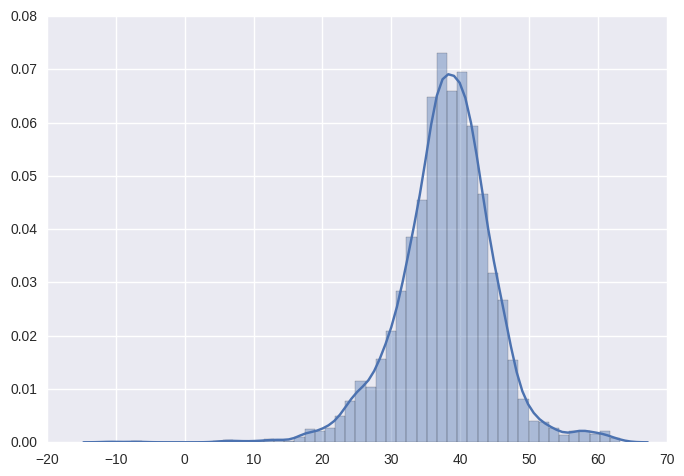

In [68]:
sns.distplot(features[0][:,2,6])
plt.show()

In [24]:
print feature_names
print frequencies
print sensor_names

('FFT', 'FFTc', 'Phase', 'Phasec', 'Mean', 'Meanc', 'Power')
[   0.            1.98412698    3.96825397    5.95238095    7.93650794
    9.92063492   11.9047619    13.88888889   15.87301587   17.85714286
   19.84126984   21.82539683   23.80952381   25.79365079   27.77777778
   29.76190476   31.74603175   33.73015873   35.71428571   37.6984127
   39.68253968   41.66666667   43.65079365   45.63492063   47.61904762
   49.6031746    51.58730159   53.57142857   55.55555556   57.53968254
   59.52380952   61.50793651   63.49206349   65.47619048   67.46031746
   69.44444444   71.42857143   73.41269841   75.3968254    77.38095238
   79.36507937   81.34920635   83.33333333   85.31746032   87.3015873
   89.28571429   91.26984127   93.25396825   95.23809524   97.22222222
   99.20634921  101.19047619  103.17460317  105.15873016  107.14285714
  109.12698413  111.11111111  113.0952381   115.07936508  117.06349206
  119.04761905  121.03174603  123.01587302 -125.         -123.01587302
 -121.03174603 -11

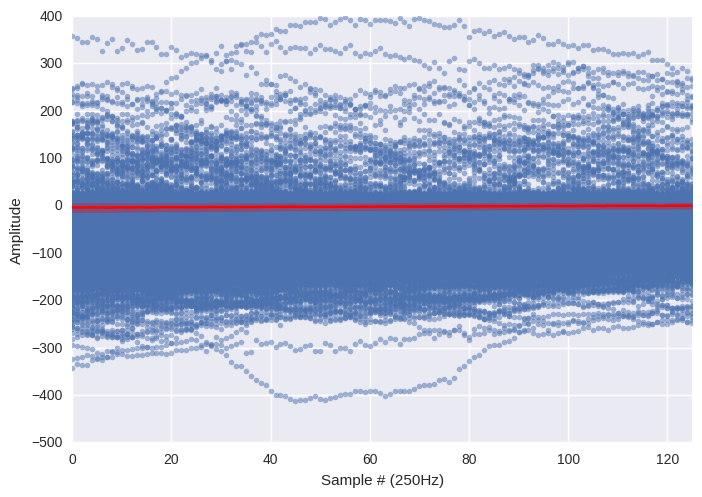

In [69]:
cpn.plot_channel_avg(X_baseline,2,title='')
plt.show()

In [41]:
RF_data.inputs.shape

(1754, 128, 1000, 1)